# Machine Learning Classification Model

## Load the data

In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel('data/microsoft-linkedin-processed.xlsx',  index_col=0)
df.index = pd.Series(df.index).apply(lambda d: d.split(" ")[0])
df

,Close,High,Low,Open,Volume,change_tomorrow,change_tomorrow_direction
Price,,,,,,,
2016-12-01,59.200001,60.150002,58.939999,60.110001,34542100,0.084387,UP
2016-12-02,59.250000,59.470001,58.799999,59.080002,25515700,1.610763,UP
2016-12-05,60.220001,60.590000,59.560001,59.700001,23552700,-0.450376,DOWN
2016-12-06,59.950001,60.459999,59.799999,60.430000,19907000,2.313831,UP
2016-12-07,61.369999,61.380001,59.799999,60.009998,30809000,-0.590068,DOWN
...,...,...,...,...,...,...,...
2024-11-04,408.459991,410.420013,405.570007,409.799988,19672300,0.729111,UP
2024-11-05,411.459991,414.899994,408.079987,408.369995,17626000,2.075301,UP
2024-11-06,420.179993,420.450012,410.519989,412.420013,26681800,1.234046,UP


## Machine Learning Model

### Separate the data

1. Target: which variable do you want to predict?
2. Explanatory: which variables will you use to calculate the prediction?

In [2]:
target = df.change_tomorrow_direction
explanatory = df.drop(columns=["change_tomorrow","change_tomorrow_direction"])
explanatory

,Close,High,Low,Open,Volume
Price,,,,,
2016-12-01,59.200001,60.150002,58.939999,60.110001,34542100
2016-12-02,59.250000,59.470001,58.799999,59.080002,25515700
2016-12-05,60.220001,60.590000,59.560001,59.700001,23552700
2016-12-06,59.950001,60.459999,59.799999,60.430000,19907000
2016-12-07,61.369999,61.380001,59.799999,60.009998,30809000
...,...,...,...,...,...
2024-11-04,408.459991,410.420013,405.570007,409.799988,19672300
2024-11-05,411.459991,414.899994,408.079987,408.369995,17626000
2024-11-06,420.179993,420.450012,410.519989,412.420013,26681800


### Compute the model

The following Python code will compute the numbers of the mathematical equation that we will use to calculate if the ticker goes UP or DOWN.

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
model_dt = DecisionTreeClassifier(max_depth=12)
model_dt.fit(X=explanatory, y=target)

DecisionTreeClassifier(max_depth=12)

### Visualize the model

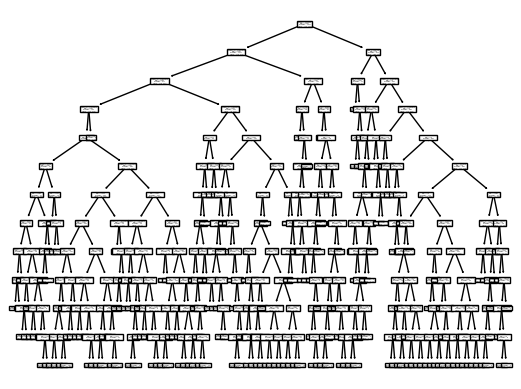

In [5]:
from sklearn.tree import plot_tree

plot_tree(decision_tree=model_dt, feature_names=model_dt.feature_names_in_);

### Calculate the predictions

In [6]:
predictions = model_dt.predict(X=explanatory)

In [7]:
df_predictions = df[['change_tomorrow_direction']].copy()
df_predictions['prediction'] = predictions
df_predictions.head(100)

,change_tomorrow_direction,prediction
Price,,
2016-12-01,UP,UP
2016-12-02,UP,UP
2016-12-05,DOWN,DOWN
2016-12-06,UP,UP
2016-12-07,DOWN,DOWN
...,...,...
2017-04-20,UP,UP
2017-04-21,UP,UP
2017-04-24,UP,UP


### Evaluate the model: compare predictions with the reality

In [8]:
comp = df.change_tomorrow_direction == df_predictions.prediction
comp.sum()/len(comp)

0.7182182182182182

In [9]:
model_dt.score(X=explanatory, y=target)

0.7182182182182182

## Save the model into a file

- We'll write the numbers of the Decision Tree's mathematical equation into a file.

In [10]:
import os

In [11]:
os.makedirs('models',exist_ok=True)

In [12]:
model_dt

DecisionTreeClassifier(max_depth=12)

In [13]:
import pickle

In [14]:
with open('models/model_dt_classifier.pkl', 'wb') as f:
    pickle.dump(model_dt, f)